# **Tame Your Python**



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

2.2.0


In [0]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people

In [3]:
# Load data
dataset = fetch_lfw_people(min_faces_per_person=100)
 
N, H, W = dataset.images.shape
X = dataset.data
y = dataset.target
target_names = dataset.target_names

In [4]:
print(target_names)

['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']


In [5]:
print(dataset.images.shape)
print(dataset.data.shape)
print(dataset.target.shape)

(1140, 62, 47)
(1140, 2914)
(1140,)


In [6]:
print(H*W)

2914


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [0]:
from sklearn.decomposition import FastICA
n_components = 80
decomposer = FastICA(n_components=n_components).fit(X_train)

X_train_d = decomposer.transform(X_train)
X_test_d = decomposer.transform(X_test)

In [9]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier (hidden_layer_sizes=(1024,), batch_size=256, verbose=True, early_stopping=True)
model.fit(X_train_d, y_train)

Iteration 1, loss = 1.59016228
Validation score: 0.543689
Iteration 2, loss = 1.52320088
Validation score: 0.543689
Iteration 3, loss = 1.46695180
Validation score: 0.543689
Iteration 4, loss = 1.41801593
Validation score: 0.543689
Iteration 5, loss = 1.38281800
Validation score: 0.543689
Iteration 6, loss = 1.35545385
Validation score: 0.543689
Iteration 7, loss = 1.33404398
Validation score: 0.543689
Iteration 8, loss = 1.31807261
Validation score: 0.543689
Iteration 9, loss = 1.29989683
Validation score: 0.543689
Iteration 10, loss = 1.27840488
Validation score: 0.543689
Iteration 11, loss = 1.25356474
Validation score: 0.543689
Iteration 12, loss = 1.22711068
Validation score: 0.543689
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=0.0001, batch_size=256, beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(1024,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [0]:
y_pred = model.predict(X_test_d)

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=target_names))

                   precision    recall  f1-score   support

     Colin Powell       0.00      0.00      0.00        28
  Donald Rumsfeld       0.00      0.00      0.00        12
    George W Bush       0.43      1.00      0.60        49
Gerhard Schroeder       0.00      0.00      0.00         8
       Tony Blair       0.00      0.00      0.00        17

         accuracy                           0.43       114
        macro avg       0.09      0.20      0.12       114
     weighted avg       0.18      0.43      0.26       114



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


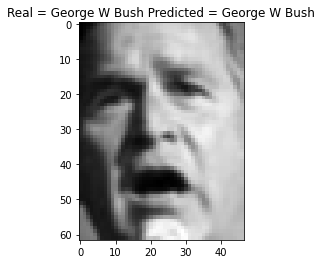

In [12]:
idx = np.random.randint(0,len(y_pred))
plt.figure()
plt.imshow(X_test[idx].reshape((H,W)), cmap = 'gray')
plt.title("Real = " + str(target_names[y_test[idx]]) + " Predicted = " + str(target_names[y_pred[idx]]))
plt.show()